<b style = 'color:red'>MUST READ</b>  
**Reference**: <http://daviddalpiaz.github.io/appliedstats/simple-linear-regression.html>


In [1]:
library(tidyverse)

-- Attaching packages ----------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

-- Conflicts -------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



# Least Square approach

>how the speed of a car affects its stopping distance, that is, how far it travels before it comes to a stop.

In [2]:
head(cars)

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10


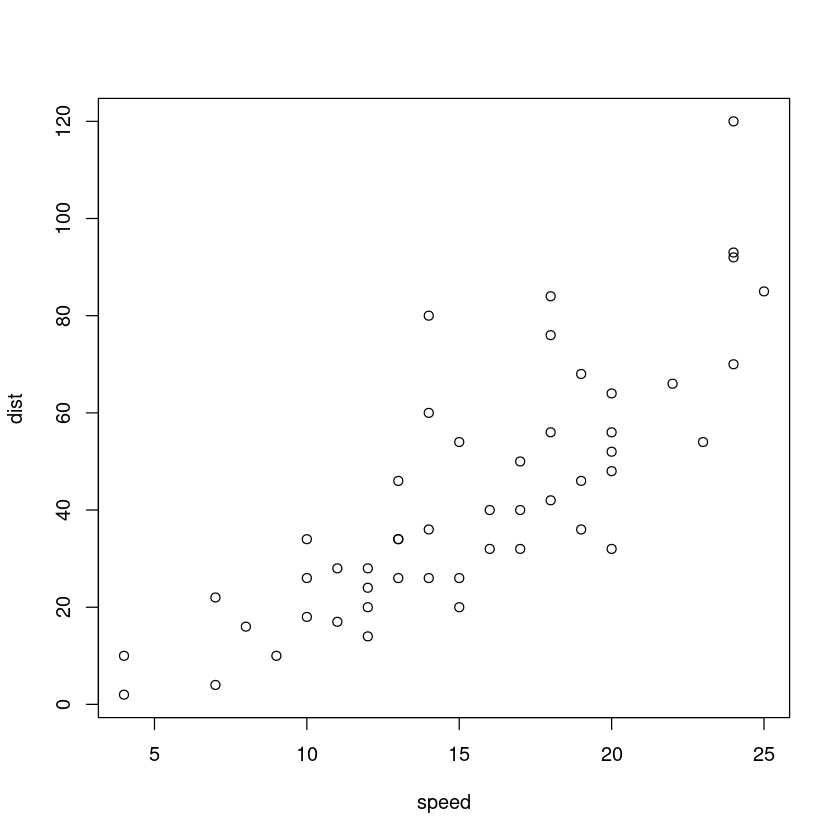

In [3]:
plot(cars)

- `speed`: Predictor(explanatory) variable
- `dist`: response (target, outcome) variable
we are interested in using the predictor variable speed to predict and explain the response variable dist.

`geom_smooth()` using formula 'y ~ x'



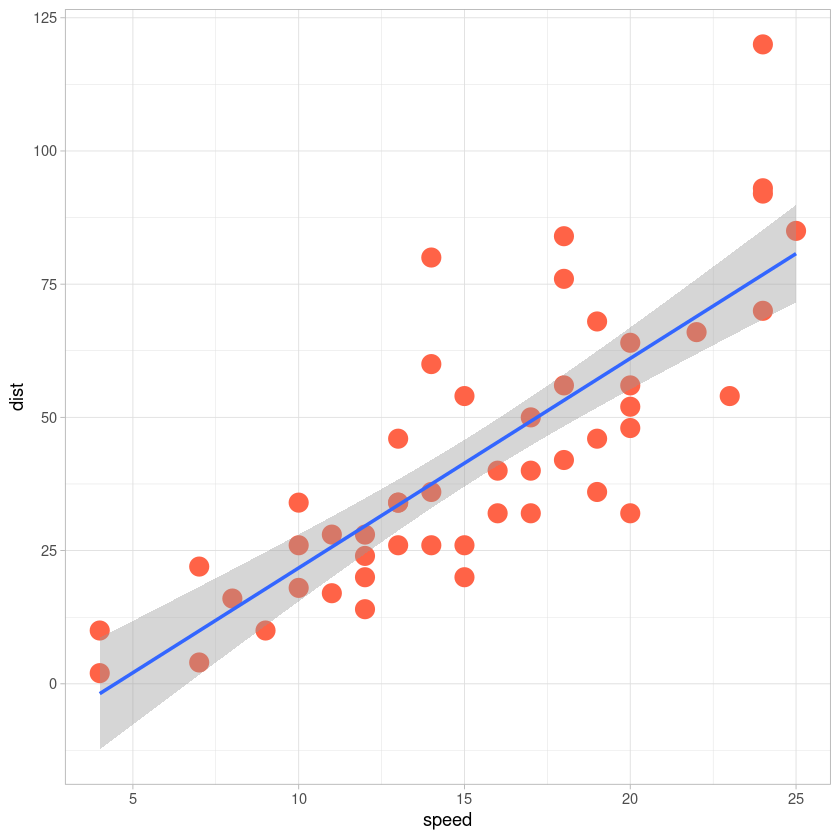

In [24]:
cars %>%
ggplot(aes(speed, dist)) + 
geom_point(size = 5, color = 'tomato') + 
geom_smooth(method = 'lm') +
theme_light()

In [10]:
mod <- lm(dist ~ speed, data = cars)
mod


Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  


In [12]:
names(mod)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

---
Extract fitted values

In [26]:
mod$fitted.values

1         2         3         4         5         6         7         8 
-1.849460 -1.849460  9.947766  9.947766 13.880175 17.812584 21.744993 21.744993 
        9        10        11        12        13        14        15        16 
21.744993 25.677401 25.677401 29.609810 29.609810 29.609810 29.609810 33.542219 
       17        18        19        20        21        22        23        24 
33.542219 33.542219 33.542219 37.474628 37.474628 37.474628 37.474628 41.407036 
       25        26        27        28        29        30        31        32 
41.407036 41.407036 45.339445 45.339445 49.271854 49.271854 49.271854 53.204263 
       33        34        35        36        37        38        39        40 
53.204263 53.204263 53.204263 57.136672 57.136672 57.136672 61.069080 61.069080 
       41        42        43        44        45        46        47        48 
61.069080 61.069080 61.069080 68.933898 72.866307 76.798715 76.798715 76.798715 
       49        50 
76.798715 80.731124

In [27]:
# equivalent
fitted(mod)

1         2         3         4         5         6         7         8 
-1.849460 -1.849460  9.947766  9.947766 13.880175 17.812584 21.744993 21.744993 
        9        10        11        12        13        14        15        16 
21.744993 25.677401 25.677401 29.609810 29.609810 29.609810 29.609810 33.542219 
       17        18        19        20        21        22        23        24 
33.542219 33.542219 33.542219 37.474628 37.474628 37.474628 37.474628 41.407036 
       25        26        27        28        29        30        31        32 
41.407036 41.407036 45.339445 45.339445 49.271854 49.271854 49.271854 53.204263 
       33        34        35        36        37        38        39        40 
53.204263 53.204263 53.204263 57.136672 57.136672 57.136672 61.069080 61.069080 
       41        42        43        44        45        46        47        48 
61.069080 61.069080 61.069080 68.933898 72.866307 76.798715 76.798715 76.798715 
       49        50 
76.798715 80.731124

---
Extract coefficients

In [14]:
# coefficients
mod$coefficients
# equivalent
coef(mod)

(Intercept)       speed 
 -17.579095    3.932409

(Intercept)       speed 
 -17.579095    3.932409

---
Extract residuals

In [16]:
mod$residuals
#equivalent
resid(mod)

1          2          3          4          5          6          7 
  3.849460  11.849460  -5.947766  12.052234   2.119825  -7.812584  -3.744993 
         8          9         10         11         12         13         14 
  4.255007  12.255007  -8.677401   2.322599 -15.609810  -9.609810  -5.609810 
        15         16         17         18         19         20         21 
 -1.609810  -7.542219   0.457781   0.457781  12.457781 -11.474628  -1.474628 
        22         23         24         25         26         27         28 
 22.525372  42.525372 -21.407036 -15.407036  12.592964 -13.339445  -5.339445 
        29         30         31         32         33         34         35 
-17.271854  -9.271854   0.728146 -11.204263   2.795737  22.795737  30.795737 
        36         37         38         39         40         41         42 
-21.136672 -11.136672  10.863328 -29.069080 -13.069080  -9.069080  -5.069080 
        43         44         45         46         47         48         49 
  2.930920  -2.933898 -18.866307  -6.798715  15.201285  16.201285  43.201285 
        50 
  4.268876

1          2          3          4          5          6          7 
  3.849460  11.849460  -5.947766  12.052234   2.119825  -7.812584  -3.744993 
         8          9         10         11         12         13         14 
  4.255007  12.255007  -8.677401   2.322599 -15.609810  -9.609810  -5.609810 
        15         16         17         18         19         20         21 
 -1.609810  -7.542219   0.457781   0.457781  12.457781 -11.474628  -1.474628 
        22         23         24         25         26         27         28 
 22.525372  42.525372 -21.407036 -15.407036  12.592964 -13.339445  -5.339445 
        29         30         31         32         33         34         35 
-17.271854  -9.271854   0.728146 -11.204263   2.795737  22.795737  30.795737 
        36         37         38         39         40         41         42 
-21.136672 -11.136672  10.863328 -29.069080 -13.069080  -9.069080  -5.069080 
        43         44         45         46         47         48         49 
  2.930920  -2.933898 -18.866307  -6.798715  15.201285  16.201285  43.201285 
        50 
  4.268876

---
Access model performance

In [8]:
report <- summary(mod)
report


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


In [9]:
names(report)

[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"

In [19]:
# coefficient of determination
report$r.squared

[1] 0.6510794

In [21]:
# f-statistics  of R^2
report$fstatistic

value    numdf    dendf 
89.56711  1.00000 48.00000

$$s_e = \sqrt{\frac{1}{n-2}\sum_{i=1}^n (y_i - \hat{y}_i)^2}$$

In [30]:
# the standard error of residuals
report$sigma

[1] 15.37959

---
Make prediction

In [29]:
predict(mod, newdata = data.frame(speed = 8))

1 
13.88018

# Maximum Likelihood Approach

Read this section: <http://daviddalpiaz.github.io/appliedstats/simple-linear-regression.html#maximum-likelihood-estimation-mle-approach>

# Simulation for Simple Linear Regression

Let's say we have the true model: $$y_i = 5 - 2 * x_i + \epsilon_i$$ 

where $\epsilon_i \sim N(0, 9)$

Let's simulate data for this model:  
For a given observation $X = x_i$, the response $Y_i$ will come from a normal distribution $N(\beta^T x_i, \sigma^2)$  
That is: $$Y_i|X = x_i \sim Normal(\beta^T x_i, \sigma^2)$$
or equivalent: $$Y_i = \beta^T x_i + \epsilon$$
where $\epsilon \sim N(0, \sigma^2)$

In [3]:
simulate_slr <- function(nobs, beta_0, beta_1, sigma) {
    x <- seq(1, 10, length.out = nobs)
    epsilon <- rnorm(nobs, mean = 0, sd = sigma)
    y <- beta_0 + beta_1 * x + epsilon
    tibble(predictor = x, response = y)
}
# draw 21 sample for the true model
set.seed(1)
sim_data <- simulate_slr(21, 5, -2, 3)

head(sim_data)

predictor,response
<dbl>,<dbl>
1.00,1.1206386
1.45,2.6509300
1.90,-1.3068858
2.35,5.0858424
2.80,0.3885233
3.25,-3.9614052


In [4]:
mod <- lm(response ~ predictor, data = sim_data)
summary(mod)


Call:
lm(formula = response ~ predictor, data = sim_data)

Residuals:
   Min     1Q Median     3Q    Max 
-7.573 -1.508  0.634  1.238  4.700 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.6453     1.3424   3.461  0.00262 ** 
predictor    -1.8127     0.2187  -8.288 9.86e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.731 on 19 degrees of freedom
Multiple R-squared:  0.7833,	Adjusted R-squared:  0.7719 
F-statistic:  68.7 on 1 and 19 DF,  p-value: 9.864e-08


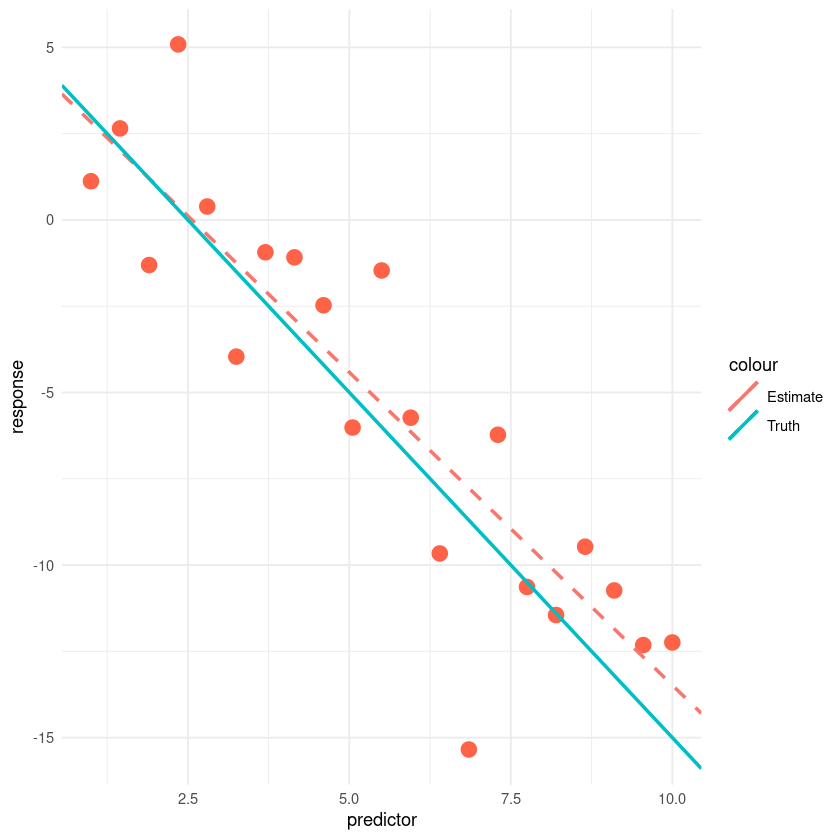

In [28]:
sim_data %>%
ggplot(aes(predictor, response)) + 
geom_point(size = 4, color = 'tomato') + 
geom_abline(aes(slope = coef(mod)[2], intercept = coef(mod)[1], color = 'Estimate'), linetype = 'dashed', size = 1) +
geom_abline(aes(slope = -2, intercept = 5, color = 'Truth'), size = 1) + 
theme_minimal()

# The heart of linear regression (Self-understanding)

Let's say that you want to model the relationship between tiger weight and tiger size. To do this, you need to collect information about all the tigers in the world. Let's say that there are 5000 tigers in the word, and by magic, you were able to collect the weight and size of all 5000 tigers in the world. You find out that there are a linear relationship between tiger weight and tiger size, and for each specific value of weight, the size corresponds to that weight follow a normal distribution, and you came out with a model that perfectly describes this linear relationship:
$$size_i = 2 + 3 * weight_i + \epsilon_i$$

where $\epsilon \sim N(0, std = 100)$

In [35]:
# simulate weight and size for 5000 tigers in the words, just ignore this part
N <- 5000
beta_0 <- 2
beta_1 <- 3
sigma <- 100

epsilon <- rnorm(N, mean = 0, sd = sigma)
weights <- rnorm(N, mean = 500, sd = 20)
sizes <- beta_0 + beta_1 * weights + epsilon

Let's say you travel the world and record the weight and size of every tiger, you obtained the weight and size of 5000 tigers that looks like below, where the `i` index is the weight of size of the `i` tiger

In [36]:
head(weights, 10)
head(sizes, 10)

[1] 519.0084 501.3901 504.8147 517.1882 514.2446 471.5433 472.3035 504.6935
 [9] 498.3857 489.0502

[1] 1637.963 1565.990 1777.339 1474.996 1581.794 1424.565 1306.878 1491.079
 [9] 1552.341 1445.070

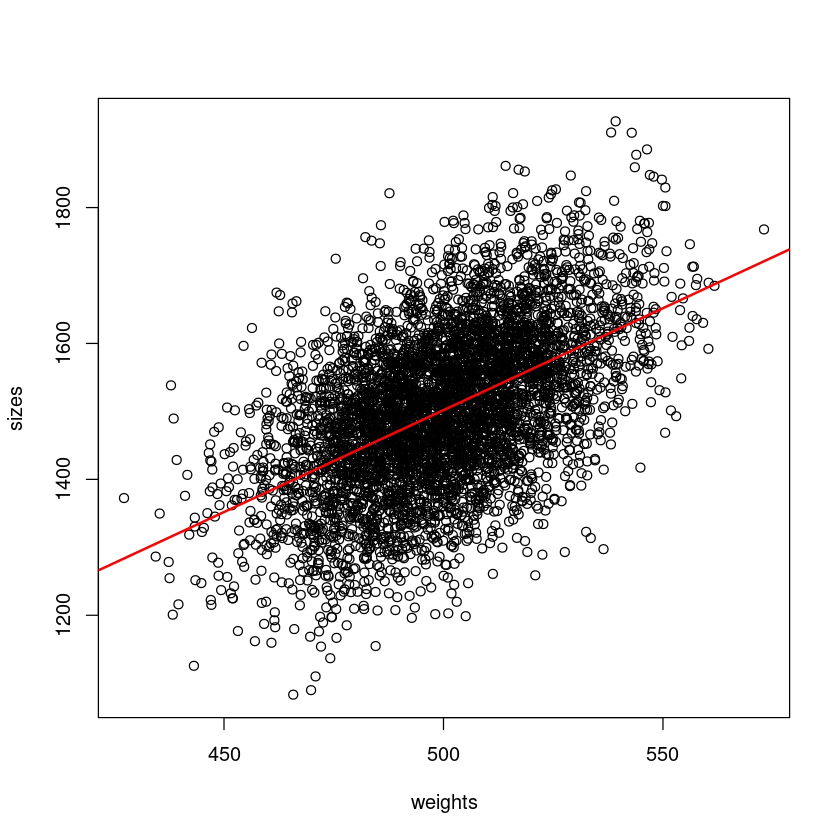

In [39]:
plot(weights, sizes)
abline(beta_0, beta_1, lwd = 2, col = 'red')

In reality, this would not be feasible to record the weight and size of all tiger in the world. But we certainly can get the weight and size of, let's say 100 tigers. Our question is, can we estimate the true model (e.g, the red line) from 100 sample?

In [52]:
# run simulation, each time we sample 100 tigers from the entire population of 5000 tigers, we will get different models

sample_size <- 100
n_simulate <- 3
models <- replicate(n_simulate, {
    ix <- sample(1:N, size = sample_size)
    sample_weights <- weights[ix]
    sample_sizes <- sizes[ix]
    mod <- lm(sample_sizes ~ sample_weights)
    # each model is an estimation of the true model
    mod
}, simplify = FALSE)

let's see how well your estimated models do with respect to the true population and the true model

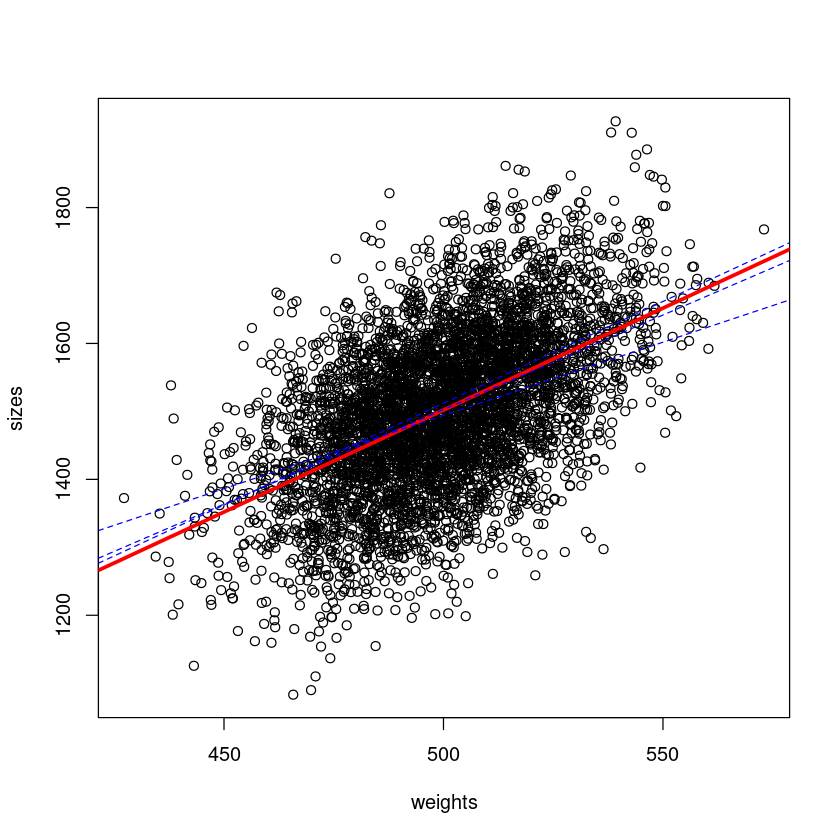

In [54]:
plot(sizes ~ weights)
abline(beta_0, beta_1, col = "red", lwd = 3)
models %>% walk(~ abline(coef(.), col = "blue", lty = "dashed"))

We can see that each model derived from 100 sample is quite close to the true model. We are making inference about the true model, by using sample. It's like when we try to calculate the population mean from the sample. In this case, we try to estimate the population linear model, by using sample